**Homeworks – Basics in linear algebra and numerical methods, 2021/22. semester I.**

*Week 6*

- name: Nagy, Balázs
- neptun: hpq7oi
- e-mail: [balazs_nagy@outlook.com](balazs_nagy@outlook.com)

In [1]:
import numpy as np 
import math
import matplotlib.pyplot as plt

The gradient descent method for minimizing $f$ where
$$f(x,y)= 2 x^2 - 4 xy + y^4$$

The gradient of $f$ is

$$\nabla f(x,y ) = (4x - 4y, -4x + 4 y^3)$$

In [2]:
# Define its gradient (computed by hand) as a function 
def grad_f(x, y):
    return np.array([4*x - 4*y, -4*x + 4 * y**3])

# Ex1

## Problem

![img/w6ex1.png](img/w6ex1.png)

## Solution

In [3]:
f = lambda x, y: 2*x**2-4*x*y+y**4

[-0.1     -0.16336]
[-0.1405504  -0.22456992]
[-0.19432289 -0.3072739 ]
[-0.26661153 -0.4130729 ]
[-0.36034681 -0.5385956 ]
[-0.47442604 -0.66922484]
[-0.59909727 -0.78103651]
[-0.71553838 -0.8595331 ]
[-0.807695   -0.91106448]
[-0.87385147 -0.94400939]
[-0.91875254 -0.96486954]
[-0.94826742 -0.97797983]
[-0.96728336 -0.98622555]
[-0.97940636 -0.99137122]
[-0.98706387 -0.99461601]
[-0.99189724 -0.9966186 ]
[-0.99491891 -0.99790319]
[-0.99682885 -0.99866873]
[-0.99800637 -0.99919183]
[-0.99876507 -0.99946634]


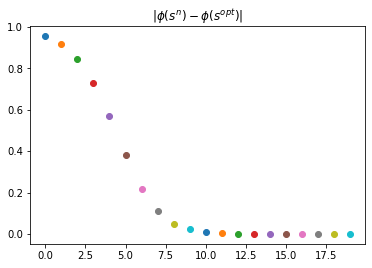

In [4]:
# minimum
f_opt = f(-1,-1)

#initial vector
v = np.array([-0.1, -0.1])

#learning rate
alpha = 0.16

v = np.array([-0.1, -0.1])
for j in range(20):
    v = v - alpha * grad_f(v[0],v[1])
    f_cur = f(*v)
    print(v)
    plt.title('$|\phi(s^n)-\phi(s^{opt})|$')
    plt.plot(j, abs(f_cur-f_opt), 'o')

# Ex2

## Problem

![img/w6ex2.png](img/w6ex2.png)

## Solution

In [5]:
v = np.array([-0.1, -0.1])
alpha = 0.40

diff = []
for j in range(20):
    v = v - alpha/(math.sqrt(j+1)) * grad_f(v[0],v[1])
    f_cur = f(*v)
    print(v)
    diff.append(abs(f_cur-f_opt))

[-0.1    -0.2584]
[-0.27920914 -0.35201696]
[-0.34646613 -0.56964442]
[-0.52500876 -0.69894001]
[-0.64946383 -0.83028814]
[-0.76757777 -0.88063732]
[-0.83594976 -0.93181315]
[-0.89017828 -0.94701821]
[-0.92049291 -0.9688055 ]
[-0.94493736 -0.97446597]
[-0.9591825  -0.98392143]
[-0.97060892 -0.98699145]
[-0.97787884 -0.99104258]
[-0.98350789 -0.99297161]
[-0.98741753 -0.99480801]
[-0.99037372 -0.99597312]
[-0.9925466 -0.9969067]
[-0.9941909 -0.9975847]
[-0.99543665 -0.99810568]
[-0.99639155 -0.99850239]


In [6]:
r = 1
N = np.array([1/(j**r) for n in range(20)])
fit = np.polyfit(N,np.log(diff),0)

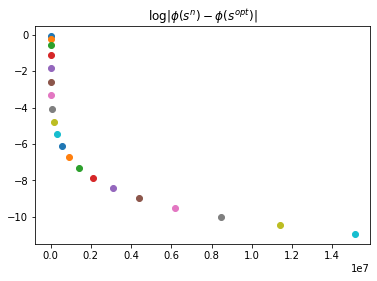

In [7]:
for j in range(20):
    plt.title('$\log|\phi(s^n)-\phi(s^{opt})|$')
    plt.plot(1/(j+1)**fit[0], np.log(diff[j]), 'o')

# Ex3

## Problem

![img/w6ex3.png](img/w6ex3.png)

## Solution

Real model:

$$s(t) = \frac{gt^2}{2}+v_0*t$$

Measured quantities:
- $s$: dustabce
- $t$: time

Parameters to find:
- $v_0$: initial speed
- $g$: gravitational constant

In [8]:
# parameters for testing
v0 = 4 
g = 9.82

[ 8.91        8.92382952  8.93766887 ... 94.47343079 94.51671048
 94.56      ]


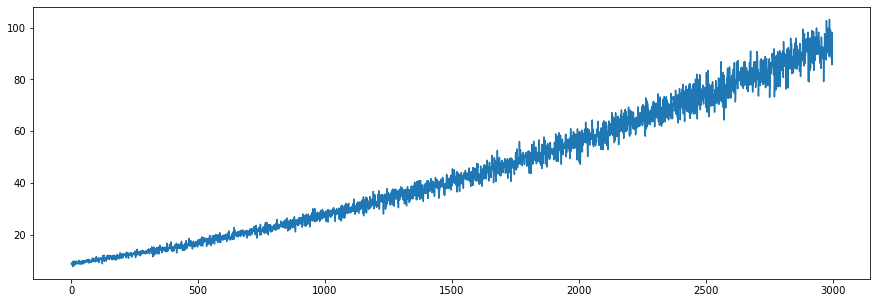

In [9]:
# Generating data:
# Time:  
t_all = np.linspace(1,4,3000)  

# analytic result distance
s_anal = g * t_all**2 /2  + v0 * t_all
# random  multiplyer
r_mult = np.random.normal(1,0.05, 3000)
# pointwise multiplication: observed data for distance
s_obs = r_mult * s_anal
# now we have 3000 observation data

plt.rcParams["figure.figsize"] = (15,5)
print(s_anal)
plt.plot(s_obs)

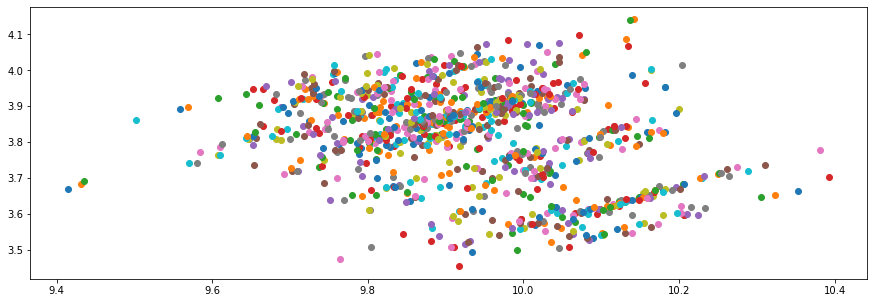

In [10]:
# Starting value
param = np.array([10.4,3.7])

# Set learning rate
alpha = 0.001

# list for storing parameters
params = [param]
grad_st = np.array([0, 0])

for k in range(1000):
    ind = np.random.randint(0, 2999, size=5)
    # compute the stochastic gradient - using vectorized operation instead of loop
    grad_st[0] = np.sum(2*(param[0] * t_all[ind]**2 /2  + param[1] * t_all[ind] - s_obs[ind])* t_all[ind]**2 /2)
    grad_st[1] = np.sum(2*(param[0] * t_all[ind]**2 /2  + param[1] * t_all[ind] - s_obs[ind])* t_all[ind])
    
    param = param - alpha * grad_st   
    
    # store results
    params.append(param)
    plt.plot(param[0], param[1], 'o')

Average of the parameters for the last 100 approximations:

In [11]:
np.mean(params[-100:], axis=0)

array([9.82114, 3.98669])